<a href="https://colab.research.google.com/github/nebblu/ML_unige/blob/main/Python_tutorials/NN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'serif'
plt.rcParams["mathtext.fontset"] = "cm"
import tensorflow_probability as tfp
import tensorflow.compat.v2 as tf
import numpy as np
import os
import copy
import tqdm
tf.enable_v2_behavior()
tf.config.run_functions_eagerly(True)

## Clone BaCoN

In [3]:
! git clone https://github.com/Mik3M4n/BaCoN

Cloning into 'BaCoN'...
remote: Enumerating objects: 315, done.
remote: Counting objects: 100% (315/315), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 315 (delta 128), reused 229 (delta 60), pack-reused 0
Receiving objects: 100% (315/315), 1.98 MiB | 8.62 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [2]:
%cd BaCoN/

/content/BaCoN


In [5]:
! git pull origin master

From https://github.com/Mik3M4n/BaCoN
 * branch            master     -> FETCH_HEAD
Already up to date.


## Download data

Data are available at https://zenodo.org/record/4309918#.X9CvPS2ZNPU

In [6]:
# Test set

! wget https://zenodo.org/record/4309918/files/test_data.zip

--2020-12-09 14:49:29--  https://zenodo.org/record/4309918/files/test_data.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150792218 (144M) [application/octet-stream]
Saving to: ‘test_data.zip’

test_data.zip       100%[===================>] 143.81M  7.40MB/s    in 16s     

2020-12-09 14:49:47 (8.88 MB/s) - ‘test_data.zip’ saved [150792218/150792218]



In [7]:
! unzip -q test_data.zip -d data/

In [8]:
%ls data/test_data

dgp/              fr_test2500.txt    planck.txt  wcdm_test2500.txt
dgp_test2500.txt  lcdm/              rand/
fr/               lcdm_test2500.txt  wcdm/


In [3]:
DIR='data/test_data'

In [10]:
labels =  ([name for name in os.listdir(DIR) if not os.path.isfile(os.path.join(DIR, name))]) ; labels

['rand', 'fr', 'wcdm', 'dgp', 'lcdm']

In [11]:
# Count number of files in each label and check that they are the same
n_s=[]
for l in labels:
  n_samples = len([name for name in os.listdir(os.path.join(DIR,l)) if os.path.isfile(os.path.join(DIR,l, name)) and 'DS_Store' not in name]) 
  print(n_samples)
  n_s.append(n_samples)

assert n_s[1:] == n_s[:-1]
n_samples = n_s[0]

2500
2500
2500
2500
2500


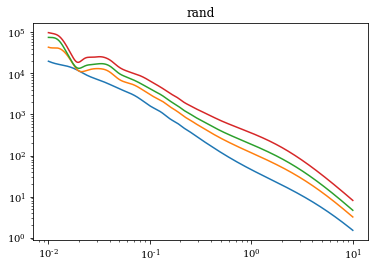

In [12]:
# Plot a random example
my_lab = np.random.choice(labels)
my_ind=np.random.randint(n_samples)
loaded = np.loadtxt(os.path.join(DIR,my_lab , str(my_ind)+'.txt') )
k, X = loaded[:, 0], loaded[:, 1:]
plt.plot(k, X);
plt.xscale('log');
plt.yscale('log');
plt.title(my_lab);

## Get data generators

In [4]:
%load_ext autoreload
%autoreload 2
from utils import *
from data_generator import *

In [5]:
FLAGS_BASE = get_default_flags()

In [6]:
FLAGS_NO_NOISE = copy.deepcopy(FLAGS_BASE)
FLAGS_NO_NOISE.add_noise = False
FLAGS_NO_NOISE.DIR = DIR
FLAGS_NO_NOISE.val_size = 0.1
FLAGS_NO_NOISE.batch_size = 250

#FLAGS.n_noisy_samples = 
#FLAGS.swap_axes = True

In [29]:
FLAGS_TEST = copy.deepcopy(FLAGS_BASE)
FLAGS_TEST.test_mode=True
FLAGS_TEST.DIR = DIR
training_generator_TEST, validation_generator_TEST = create_generators(FLAGS_TEST)

labels : ['dgp', 'fr', 'lcdm', 'rand', 'wcdm']
Labels encoding: 
{'dgp': 0, 'fr': 1, 'lcdm': 2, 'rand': 3, 'wcdm': 4}
n_labels : 5
dgp - 2500 training examples
fr - 2500 training examples
lcdm - 2500 training examples
rand - 2500 training examples
wcdm - 2500 training examples

N. of data files: 2500
Choice with seed 1312 
all_index shape for test mode: 2
get_all_indexes labels dict: {'dgp': 0, 'fr': 1, 'lcdm': 2, 'rand': 3, 'wcdm': 4}
create_generators n_labels: 5
create_generators n_labels_eff: 5
create_generators len_c1: 1
Check for no duplicates in test: (0=ok):
0.0
Check for no duplicates in val: (0=ok):
0
N of files in training set: 1
N of files in validation set: 1
N of files in test set: 0
Check - total: 2
--create_generators, train indexes
batch_size: 50
Train index: [1922]
--create_generators, validation indexes
Validation index: [2322]
len(train_index_1), batch_size, n_labels_eff, n_noisy_samples = 1, 50, 5, 10

--DataGenerator Train
Data Generator Initialization
Using z bin

In [7]:
training_generator_NO_NOISE, validation_generator_NO_NOISE = create_generators(FLAGS_NO_NOISE)

labels : ['dgp', 'fr', 'lcdm', 'rand', 'wcdm']
Labels encoding: 
{'dgp': 0, 'fr': 1, 'lcdm': 2, 'rand': 3, 'wcdm': 4}
n_labels : 5
dgp - 2500 training examples
fr - 2500 training examples
lcdm - 2500 training examples
rand - 2500 training examples
wcdm - 2500 training examples

N. of data files: 2500
get_all_indexes labels dict: {'dgp': 0, 'fr': 1, 'lcdm': 2, 'rand': 3, 'wcdm': 4}
create_generators n_labels: 5
create_generators n_labels_eff: 5
create_generators len_c1: 1
Check for no duplicates in test: (0=ok):
0.0
Check for no duplicates in val: (0=ok):
0
N of files in training set: 2250
N of files in validation set: 250
N of files in test set: 0
Check - total: 2500
--create_generators, train indexes
batch_size: 250
- Cut sample
bs: 250
N_labels: 5
N_noise: 1
len_c1: 1
Train index length: 2250
--create_generators, validation indexes
- Cut sample
bs: 250
N_labels: 5
N_noise: 1
len_c1: 1
Val index length: 250
len(train_index_1), batch_size, n_labels_eff, n_noisy_samples = 2250, 250, 5, 

In [8]:
FLAGS_NOISE = copy.deepcopy(FLAGS_BASE)
#FLAGS_NOISE.add_noise = False
FLAGS_NOISE.n_noisy_samples=1
FLAGS_NOISE.DIR = DIR
FLAGS_NOISE.val_size = 0.1
FLAGS_NOISE.batch_size = 250

In [9]:
training_generator_NOISE, validation_generator_NOISE = create_generators(FLAGS_NOISE)

labels : ['dgp', 'fr', 'lcdm', 'rand', 'wcdm']
Labels encoding: 
{'dgp': 0, 'fr': 1, 'lcdm': 2, 'rand': 3, 'wcdm': 4}
n_labels : 5
dgp - 2500 training examples
fr - 2500 training examples
lcdm - 2500 training examples
rand - 2500 training examples
wcdm - 2500 training examples

N. of data files: 2500
get_all_indexes labels dict: {'dgp': 0, 'fr': 1, 'lcdm': 2, 'rand': 3, 'wcdm': 4}
create_generators n_labels: 5
create_generators n_labels_eff: 5
create_generators len_c1: 1
Check for no duplicates in test: (0=ok):
0.0
Check for no duplicates in val: (0=ok):
0
N of files in training set: 2250
N of files in validation set: 250
N of files in test set: 0
Check - total: 2500
--create_generators, train indexes
batch_size: 250
- Cut sample
bs: 250
N_labels: 5
N_noise: 1
len_c1: 1
Train index length: 2250
--create_generators, validation indexes
- Cut sample
bs: 250
N_labels: 5
N_noise: 1
len_c1: 1
Val index length: 250
len(train_index_1), batch_size, n_labels_eff, n_noisy_samples = 2250, 250, 5, 

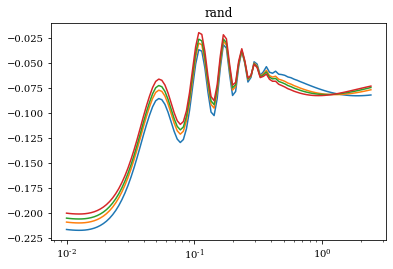

In [10]:
batch_idx = np.random.randint(training_generator_NO_NOISE.n_batches)
ex_idx = np.random.randint(training_generator_NO_NOISE.batch_size)

X_features, y = training_generator_NO_NOISE[batch_idx][0][ex_idx], training_generator_NO_NOISE[batch_idx][1][ex_idx]

my_lab = training_generator_NO_NOISE.inv_labels_dict[np.argmax(y)]
plt.plot(training_generator_NO_NOISE.all_ks, X_features);
plt.xscale('log');
#plt.yscale('log');
plt.title(my_lab);

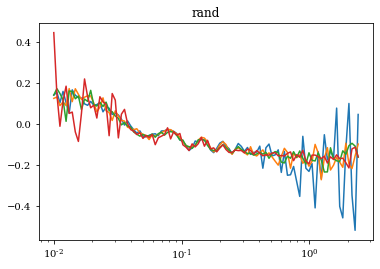

In [11]:
batch_idx = np.random.randint(training_generator_NOISE.n_batches)
ex_idx = np.random.randint(training_generator_NOISE.batch_size)

X_features, y = training_generator_NOISE[batch_idx][0][ex_idx], training_generator_NOISE[batch_idx][1][ex_idx]

my_lab = training_generator_NOISE.inv_labels_dict[np.argmax(y)]
plt.plot(training_generator_NOISE.all_ks, X_features);
plt.xscale('log');
#plt.yscale('log');
plt.title(my_lab);

In [12]:
training_generator_NOISE.n_batches

45

## Model

In [21]:
def make_model_dense(input_shape, n_classes):
  
  inputs = tf.keras.Input(shape=input_shape)

  x = tf.keras.layers.Flatten()(inputs)
  x = tf.keras.layers.Dense(50, activation=tf.nn.leaky_relu)(x)

  x = tf.keras.layers.Dropout(0.5)(x)
  outputs = tf.keras.layers.Dense(n_classes)(x)
  
  model = tf.keras.Model(inputs, outputs)
  model.build(input_shape=input_shape)
  print(model.summary())

  return model

In [91]:
def make_model_conv(input_shape, n_classes):
  
  inputs = tf.keras.Input(shape=input_shape)

  # 1st conv block
  x = tf.keras.layers.Conv1D(filters=32, input_shape=input_shape , 
                                  kernel_size=10, strides=2, 
                                  padding='valid', activation=tf.nn.leaky_relu)(inputs)
  #tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='valid')
  x=tf.keras.layers.BatchNormalization()(x)

  # 2nd conv block
  #x = tf.keras.layers.Conv1D(filters=16, input_shape=input_shape , 
  #                                kernel_size=5, strides=2, 
  #                                padding='valid', activation=tf.nn.leaky_relu)(x)
  #x=tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='valid')(x)
  #x=tf.keras.layers.BatchNormalization()(x)

  # 3rd conv block
  #x = tf.keras.layers.Conv1D(filters=32, input_shape=input_shape , 
  #                                kernel_size=2, strides=1, 
  #                                padding='valid', activation=tf.nn.leaky_relu)(x)
  #tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='valid')
  #x=tf.keras.layers.BatchNormalization()(x)

  # Glob avg pooling
  x=tf.keras.layers.GlobalAveragePooling1D()(x)

  # Dense
  x = tf.keras.layers.Dense(32, activation=tf.nn.leaky_relu)(x)
  
  # Dropout
  x = tf.keras.layers.Dropout(0.5)(x)

  # Classification
  outputs = tf.keras.layers.Dense(n_classes)(x)
  
  model = tf.keras.Model(inputs, outputs)
  model.build(input_shape=input_shape)
  print(model.summary())

  return model

## Training

In [15]:
@tf.function
def calculate_loss(y, logits):
    loss_f = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    return loss_f(y, logits)

In [16]:
@tf.function
def train_on_batch(y, x, model, opt, metric):
    with tf.GradientTape() as tape:
        tape.watch(model.trainable_variables)
        logits=model(x)
        loss = calculate_loss(y, logits)
    gradients = tape.gradient(loss, model.trainable_weights)
    opt.apply_gradients(zip(gradients, model.trainable_weights))
    
    proba = tf.nn.softmax(logits)
    prediction = tf.argmax(proba, axis=1)
    metric.update_state(tf.argmax(y, axis=1), prediction)
    return loss


@tf.function
def validation_step(y, x, model, metric):
    logits = model(x, training=False)
    loss = calculate_loss(y, logits)

    proba = tf.nn.softmax(logits)
    prediction = tf.argmax(proba, axis=1)
    metric.update_state(tf.argmax(y, axis=1), prediction)
    return loss

In [61]:
def my_train(model, optimizer,
             epochs, 
             train_generator, 
             val_generator,
             ): 
  batches = train_generator.n_batches
  val_batches = val_generator.n_batches

  train_acc_metric = tf.keras.metrics.Accuracy()
  val_acc_metric = tf.keras.metrics.Accuracy()

  loss = []
  val_loss = []
  acc = []
  val_acc = []

  epoch_bar = tqdm.tnrange(epochs, desc="Epochs")#tnrange(epochs, desc="Epochs")
  batch_bar = tqdm.tnrange(batches, desc="Batch")#tnrange(batches, desc="Batch")

  for epoch in epoch_bar:

    for train_batch in batch_bar:
        x_batch_train, y_batch_train = train_generator[train_batch] 
        this_loss = train_on_batch(y_batch_train, x_batch_train, model, optimizer, train_acc_metric)
    loss.append(this_loss.numpy())
    
    this_val_loss = 0.
    for val_batch in range(val_batches):
        x_batch_val, y_batch_val =  val_generator[val_batch]
        this_val_loss += ( validation_step(y_batch_val, x_batch_val, model, val_acc_metric)  / float(val_batches) )
        
    val_loss.append(this_val_loss.numpy())

    train_acc_val = train_acc_metric.result().numpy()
    val_acc_val = val_acc_metric.result().numpy()
    acc.append(train_acc_val)
    val_acc.append(val_acc_val)

    epoch_bar.set_postfix(loss=this_loss.numpy(), val_loss=this_val_loss.numpy(), acc=train_acc_val, val_acc = val_acc_val)

    train_acc_metric.reset_states()
    val_acc_metric.reset_states()

  return loss, val_loss, acc, val_acc

In [62]:
my_input_shape = training_generator_NOISE[0][0][0].shape
my_input_shape

(100, 4)

In [69]:
model_dense = make_model_dense(my_input_shape, training_generator_NOISE.n_classes_out)

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 100, 4)]          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 50)                20050     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 255       
Total params: 20,305
Trainable params: 20,305
Non-trainable params: 0
_________________________________________________________________
None


In [92]:
model_conv = make_model_conv(my_input_shape, training_generator_NOISE.n_classes_out)

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 100, 4)]          0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 46, 32)            1312      
_________________________________________________________________
batch_normalization_18 (Batc (None, 46, 32)            128       
_________________________________________________________________
global_average_pooling1d_8 ( (None, 32)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 5)               

In [71]:
opt = tf.keras.optimizers.Adam(lr=1e-03)

In [72]:
#loss, val_loss = my_train(model_dense, opt, 3, training_generator_NO_NOISE, validation_generator_NO_NOISE)

#### Check: with only few points, I can completely overfit 

In [79]:
def plot_hist(loss, val_loss, acc, val_acc, epochs):

  epochs_range = range(epochs)

  plt.figure(figsize=(18, 4))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss');

  plt.show()

In [80]:
epochs=200

In [93]:
loss, val_loss, acc, val_acc = my_train(model_conv, opt, epochs, training_generator_TEST, validation_generator_TEST)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


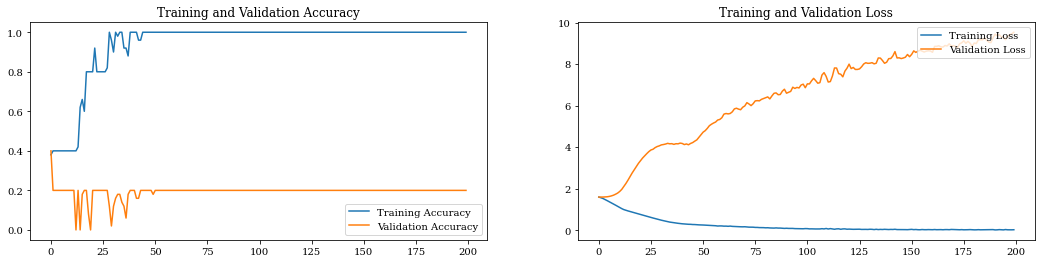

In [94]:
plot_hist(loss, val_loss, acc, val_acc, epochs)

In [75]:
loss1, val_loss1, acc1, val_acc1 = my_train(model_dense, opt, epochs, training_generator_TEST, validation_generator_TEST)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


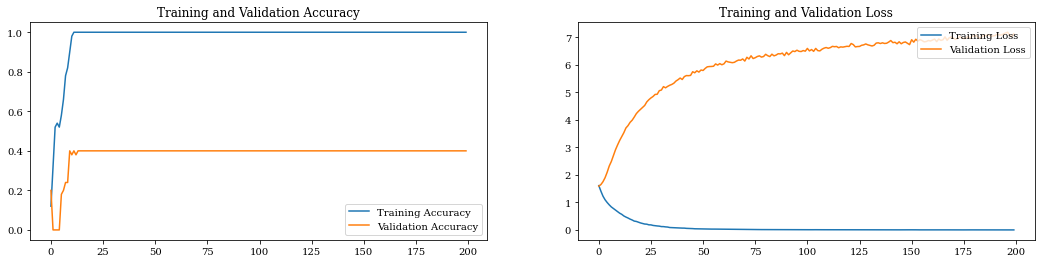

In [83]:
plot_hist(loss1, val_loss1, acc1, val_acc1, epochs)

## Full training

#### Simple models, no noise

In [84]:
model_dense = make_model_dense(my_input_shape, training_generator_NO_NOISE.n_classes_out)

loss, val_loss, acc, val_acc = my_train(model_dense, opt, 50, training_generator_NO_NOISE, validation_generator_NO_NOISE)

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 100, 4)]          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                20050     
_________________________________________________________________
dropout_13 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 255       
Total params: 20,305
Trainable params: 20,305
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


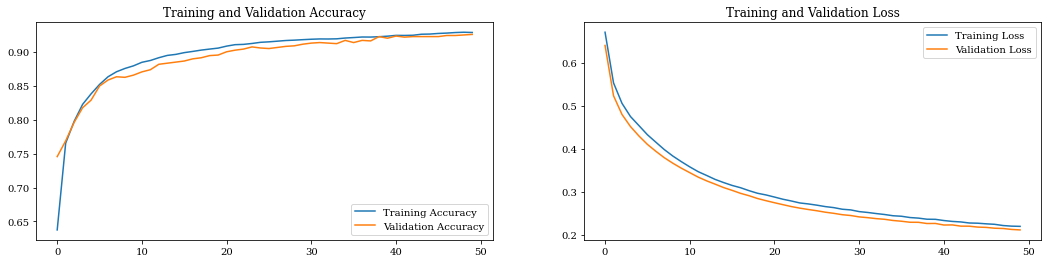

In [85]:
plot_hist(loss, val_loss, acc, val_acc, 50)

In [95]:
model_conv = make_model_conv(my_input_shape, training_generator_NO_NOISE.n_classes_out)

loss1, val_loss1, acc1, val_acc1 = my_train(model_conv, opt, 50, training_generator_NO_NOISE, validation_generator_NO_NOISE)

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 100, 4)]          0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 46, 32)            1312      
_________________________________________________________________
batch_normalization_19 (Batc (None, 46, 32)            128       
_________________________________________________________________
global_average_pooling1d_9 ( (None, 32)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 5)               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


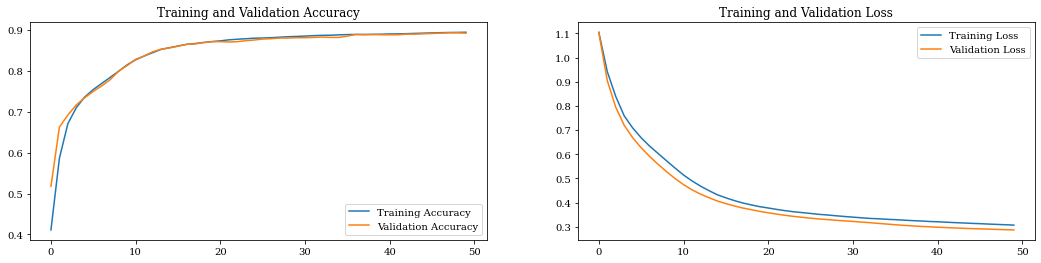

In [97]:
plot_hist(loss1, val_loss1, acc1, val_acc1, 50)

#### Add noise

In [98]:
model_dense_1 = make_model_dense(my_input_shape, training_generator_NOISE.n_classes_out)

lossN, val_lossN, accN, val_accN = my_train(model_dense_1, opt, 50, training_generator_NOISE, validation_generator_NOISE)

Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 100, 4)]          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 50)                20050     
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 5)                 255       
Total params: 20,305
Trainable params: 20,305
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


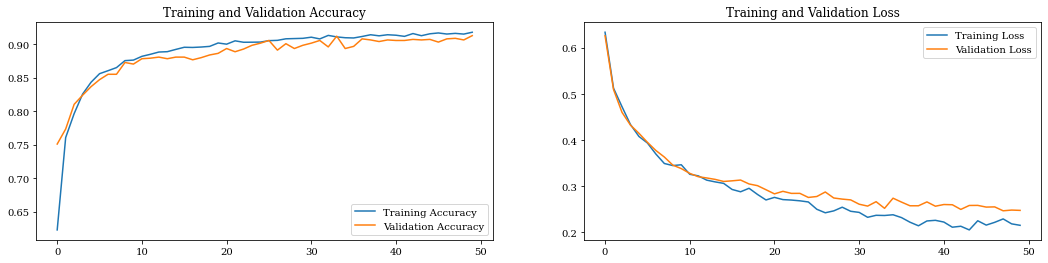

In [104]:
plot_hist(lossN, val_lossN, accN, val_accN, 50)

In [100]:
model_conv_1 = make_model_conv(my_input_shape, training_generator_NOISE.n_classes_out)

loss1N, val_loss1N, acc1N, val_acc1N = my_train(model_conv_1, opt, 50, training_generator_NOISE, validation_generator_NOISE)

Model: "functional_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 100, 4)]          0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 46, 32)            1312      
_________________________________________________________________
batch_normalization_20 (Batc (None, 46, 32)            128       
_________________________________________________________________
global_average_pooling1d_10  (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 5)               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


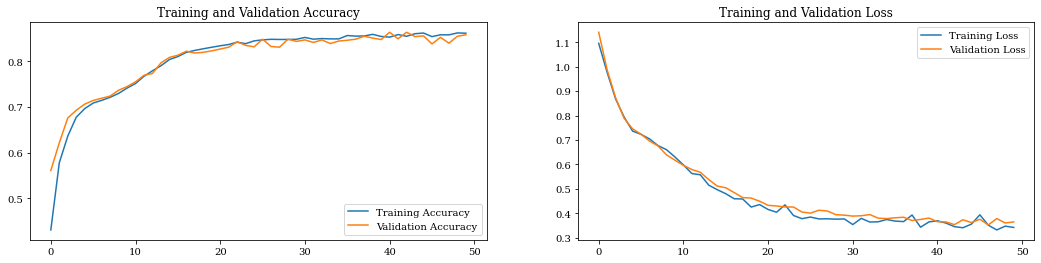

In [101]:
plot_hist(loss1N, val_loss1N, acc1N, val_acc1N, 50)

#### Compare to actual BaCoN

In [87]:
from models import make_model

In [88]:
BaCoN = make_model('custom', bayesian=False)

lossB, val_lossB, accB, val_accB = my_train(BaCoN, opt, 50, training_generator_NO_NOISE, validation_generator_NO_NOISE)

using 1D layers and 4 channels
Expected output dimension of layer conv1d_21: 46.0
Expected output dimension of layer max_pooling1d_14: 23.0
Expected output dimension of layer conv1d_22: 10.0
Expected output dimension of layer max_pooling1d_15: 9.0
Expected output dimension of layer conv1d_23: 8.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


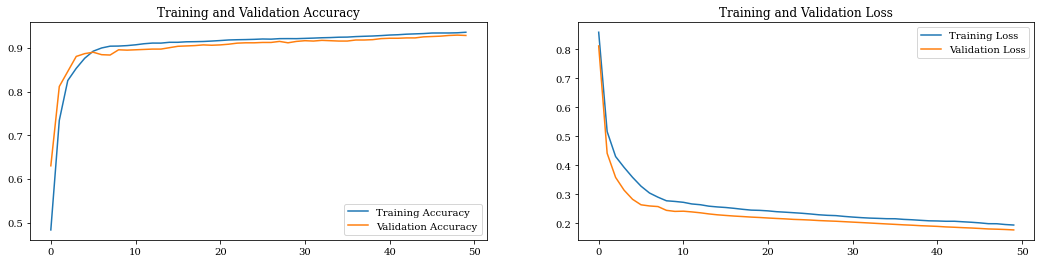

In [90]:
plot_hist(lossB, val_lossB, accB, val_accB, 50)

In [102]:
BaCoN1 = make_model('custom', bayesian=False)
print(BaCoN1.summary())
lossBN, val_lossBN, accBN, val_accBN = my_train(BaCoN1, opt, 50, training_generator_NOISE, validation_generator_NOISE)

using 1D layers and 4 channels
Expected output dimension of layer conv1d_27: 46.0
Expected output dimension of layer max_pooling1d_16: 23.0
Expected output dimension of layer conv1d_28: 10.0
Expected output dimension of layer max_pooling1d_17: 9.0
Expected output dimension of layer conv1d_29: 8.0
Model: "functional_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 100, 4)]          0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 46, 8)             328       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 23, 8)             0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 23, 8)             32        
_________________________________________________________________
conv1d_28 (Conv1D) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


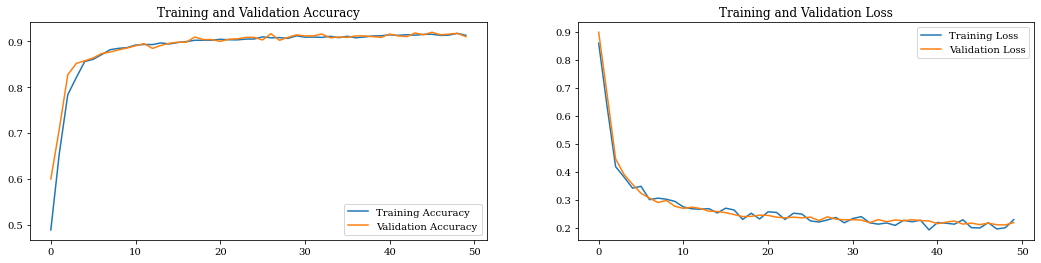

In [103]:
plot_hist(lossBN, val_lossBN, accBN, val_accBN, 50)

#### Syntax to run BaCoN

In [105]:
! python train.py --bayesian='False' --fname='bacon_test' --DIR='data/test_data/' --add_noise='True'\
                  --lr=0.001 --drop=0.5 --n_epochs=50 --val_size=0.1 --batch_size=250

2020-12-09 19:48:38.676272: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Creating directory models/bacon_test
Logger creating log file: models/bacon_test/bacon_test_log.txt

 -------- Parameters:
bayesian False
test_mode False
n_test_idx 2
seed 1312
fine_tune False
one_vs_all False
c_0 ['lcdm']
c_1 ['dgp', 'fR', 'rand', 'wcdm']
dataset_balanced False
include_last False
log_path 
restore False
fname bacon_test
model_name custom
my_path None
DIR data/test_data/
TEST_DIR data/test_data/
models_dir models/
save_ckpt True
out_path_overwrite False
im_depth 500
im_width 1
im_channels 4
swap_axes True
sort_labels True
normalization stdcosmo
sample_pace 4
k_max 2.5
i_max None
add_noise True
n_noisy_samples 10
add_shot True
add_sys True
sigma_sys 5.0
z_bins [0, 1, 2, 3]
n_dense 1
filters [8, 16, 32]
kernel_sizes [10, 5, 2]
strides [2, 2, 1]
pool_sizes [2, 2, 0]
strides_pooling [2, 1, 0]
add_FT_dense False
trainable False
un

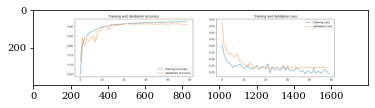

In [106]:
import matplotlib.image as mpimg

img = mpimg.imread('models/bacon_test/hist.png')
plt.imshow(img)
plt.show()

Improvements:

* batch size
* 